# Methods for solving systems of equations

Direct solvers for invertible linear systems: LU factorization

Fixed point iterations

    * For linear systems: Jacobi, Gauss-Seidel, SOR, CG
    * Newton's method, Quasi-Newton's method

## Solving $Ax=b$ by $PA=LU$

$LUx=PAx=Pb$

1. Solve $Ly=Pb$ (equivalently, $Ux=L^{-1}(Pb)$)
2. Solve $Ux=y$.

$P$ records how rows of $A$ are interchanged. This is called *partial pivoting* of $A$.

$L$ is a lower triangular matrix

$U$ is an upper triangular matrix

They are easier to solve: *back-substitution*

You need to know:

* the mechanism of Gaussian elimination and the count for operations $O(n^3)$
* how is LU related to Gaussian elimination
* how to use a software package computing the LU factorization
* why is pivoting necessary for certain cases?

**In general, use the "backslash" operator** implemnted in MATLAB or Julia. It is a very robust and efficient implementation that includes Gaussian elimination.

Such methods are called **direct solvers**, which is different from the iterative methods that we will look into later.

### Gaussian elimination for $Ax=b$

A sequence of operations that reduces $A$ to an upper triangular matrix.

In [ ]:
function naive_Gaussian_elimination!(A,b)
       
    for j=1:size(A,2)-1
        #eliminate column j    

    end
    
end

In [79]:
function naive_Gaussian_elimination!(A,b)
       
    for j=1:size(A,2)-1
        #eliminate column j    
        for i=j+1:size(A,1) #for each row below the jth-row
            mult=A[i,j]/A[j,j]

            for k=j+1:size(A,1) #for each column in the i-th row beyond the diagonal element
                A[i,k] = A[i,k] - mult*A[i,k] 
            end
            A[i,1:j] .=0.0 #this is the consequence of choosing 'mult'. 

            b[i] = b[i]-mult*b[j]
        end
    end
    
end

naive_Gaussian_elimination! (generic function with 2 methods)

In [80]:
A=rand(4,4)
b=rand(4)

display(A)
naive_Gaussian_elimination!(A,b)
display(A)

A=rand(4,4)
A[1,1]=0.0

using LinearAlgebra
fac=lu(A)
display(fac.U)

4×4 Array{Float64,2}:
 0.717663  0.112354  0.172319  0.36878 
 0.204488  0.339701  0.931258  0.699811
 0.288422  0.480342  0.150754  0.458171
 0.731569  0.985481  0.620735  0.781651

4×4 Array{Float64,2}:
 0.717663  0.112354   0.172319    0.36878   
 0.0       0.242908   0.66591     0.50041   
 0.0       0.0       -0.0164774  -0.050078  
 0.0       0.0        0.0        -0.00347448

4×4 Array{Float64,2}:
 0.834199   0.702558  0.372986   0.888226
 0.0       -0.350248  0.138084   0.200765
 0.0        0.0       0.29322    1.00913 
 0.0        0.0       0.0       -0.249183

In [84]:
A=rand(4,4)
A[1,1]=0.0

fac=lu(A)
display(fac.U)

naive_Gaussian_elimination!(A,b)

display(A)

4×4 Array{Float64,2}:
 0.706675  0.269127  0.888029  0.415364
 0.0       0.749374  0.173457  0.258258
 0.0       0.0       0.717602  0.792846
 0.0       0.0       0.0       0.127578

4×4 Array{Float64,2}:
 0.0     0.313292     0.790119     0.900816
 0.0  -Inf         -Inf         -Inf       
 0.0     0.0        NaN          NaN       
 0.0     0.0          0.0        NaN       

In [3]:
using LinearAlgebra

A=[2. 1. 5.; 4. 4. -4.; 1. 3. 1.]

b=[5., 0., 6.]

N=10000
A=rand(N,N)
b=rand(N)

fac=lu(A)

#display(fac.p)
#display(fac.L)
#display(fac.U)

#Step 1:
y=fac.L\b[fac.p]

#Step 2:
x=fac.U\y

#check Ax=b
norm(A*x - b)/N


7.396952951111254e-13

In [17]:
### The need for pivoting

A=[5 1.0;1e9 2.0]

b=[1, 4.0]

x_=A\b
#display(x_)
#display(A*x_ -b)

#turn off pivoting
fac=lu(A, Val(false))
#fac=lu(A)


#display(fac.p)

#Step 1:
y=fac.L\b[fac.p]

#Step 2:
x=fac.U\y

#check Ax=b
#A*x == b

display(A*x-b)


2-element Array{Float64,1}:
 0.0                  
 1.2253979164711382e-8

In [100]:
#turn off pivoting
fac=lu(A, Val(true))


#Step 1:
y=fac.L\b[fac.p]

#Step 2:
x=fac.U\y

#check Ax=b
A*x == b

display(A*x-b)

2-element Array{Float64,1}:
 0.0
 0.0

### Example: solving a two-point boundary value problem for Poisson's equation

$$ -u_{xx} =f(x),~~~0<x<1,~~~u(0)=u(1)=0 $$

* Discretize the unit interval: $x_j = j\Delta x, j=0,1,2,\cdots,N,\Delta x =1/N$

* Approximate the differential equation on the grid nodes:
    $$ -u_{xx} (x_j)=f(x_j) \approx -(u_{j+1}-2u_j+u_{j-1})/\Delta x^2 = f(x_j),~~~j=1,2,\cdots,N-1 $$

* Set the boundary conditions: $u_0=0=u_N$.

This leads to a linear system to solve: $AU=F$.

In [22]:
using LinearAlgebra

N=50
xgrid=range(0.0 ,stop=1.0,length=N+1)
Δx=1/N

f(x)=1.0 #x.^2+0.0*sin(20*x)

#The vector U stores (u1,u2,u3,cdots, u_(N-1))
U=zeros(N-1)

#N-2 because we exclude x=0 and X=1.
A=diagm(0=>-2.0 .*ones(N-1), 1=>ones(N-2), -1=>ones(N-2))



F=collect(f.(xgrid[2:end-1]))

b=F.*Δx^2

@time U=-A\b

  1.557402 seconds (4.68 M allocations: 229.258 MiB, 11.27% gc time)


49-element Array{Float64,1}:
 0.00979999999999998 
 0.019199999999999964
 0.028199999999999947
 0.03679999999999994 
 0.044999999999999936
 0.05279999999999993 
 0.06019999999999994 
 0.06719999999999997 
 0.0738              
 0.08000000000000004 
 0.08580000000000007 
 0.09120000000000009 
 0.09620000000000012 
 ⋮                   
 0.09120000000000053 
 0.08580000000000053 
 0.0800000000000005  
 0.07380000000000048 
 0.06720000000000044 
 0.06020000000000038 
 0.05280000000000031 
 0.045000000000000255
 0.0368000000000002  
 0.028200000000000152
 0.019200000000000106
 0.009800000000000052

### Use Sparse matrices to save on storage

For large matrices that contains a lot of zeros, it may be necessary to use "sparse matrices" for storing the matrix information

In [23]:
using SparseArrays

sA=spdiagm(0=>-2.0 .*ones(N-1), 1=>ones(N-2), -1=>ones(N-2))

@time U=-sA\b

  0.000059 seconds (54 allocations: 24.766 KiB)


49-element Array{Float64,1}:
 0.00979999999999998 
 0.019199999999999964
 0.028199999999999947
 0.03679999999999994 
 0.044999999999999936
 0.05279999999999993 
 0.06019999999999994 
 0.06719999999999997 
 0.0738              
 0.08000000000000004 
 0.08580000000000007 
 0.09120000000000009 
 0.09620000000000012 
 ⋮                   
 0.09120000000000053 
 0.08580000000000053 
 0.0800000000000005  
 0.07380000000000048 
 0.06720000000000044 
 0.06020000000000038 
 0.05280000000000031 
 0.045000000000000255
 0.0368000000000002  
 0.028200000000000152
 0.019200000000000106
 0.009800000000000052

### The Euler-Bernoulli Beam problem

$$ EI y^{\prime\prime\prime\prime}(x)=f(x), 0\le x\le L $$

We need to provide appropirate *boundary conditions* to get a unqiue solution.

#### Modeling a diving board
$y(x)$ describes the vertical displacement of the board at position $x$.

The board has length $L$, and is fixed (clamped) at $x=0$ and free at $x=L$.
This corresponds to the conditions: 
* at the clamped end: $$y(0)=0, y^\prime(0)=0$$
* at the free end: $$y^{\prime\prime}(L)=0, y^{\prime\prime\prime\prime}(L)=0$$

In the following, we shall create a matrix $A_h y_h=f_h$ to get an approximation of the solution at increments of $h$: $yh[j] \approx y[jh]$

In [152]:
function EB_Beam(N)
    L=1.0

    #use N+1 points to discretize [0,L]
    #N=500
    Δx=L/N

    x = range(Δx, stop=L, step=Δx)

    y=zeros(size(x)) #y[j]=j*Δx

    #define the matrix A
    #first generate
    A=diagm(0=>6.0 .* ones(N), 1=> -4.0 .* ones(N-1), -1=> -4.0 .* ones(N-1), 2=> ones(N-2), -2=> ones(N-2))

    #implement the boundary conditions at x=0
    A[1,1]=16
    A[1,2]=-9.0
    A[1,3]= 8/3
    A[1,4]=-1/4

    #implement the boundary conditions at x=L
    @view(A[N-1, N-3:N]) .= [ 16/17, -60/17,  72/17, -28/17]
    @view(A[N  , N-3:N]) .= [-12/17,  96/17,-156/17,  72/17]


    #display(A)
    
    forcing = ones(size(A,2))

    @time fac=lu(A)
    
    #Step 1:
    z=fac.L\(Δx^4 .*forcing[fac.p])

    #Step 2:
    y=fac.U\z

    #check Ax=b
    #A*y ≈ Δx^4 .* forcing
    
    return (x,y)
end    

EB_Beam (generic function with 1 method)

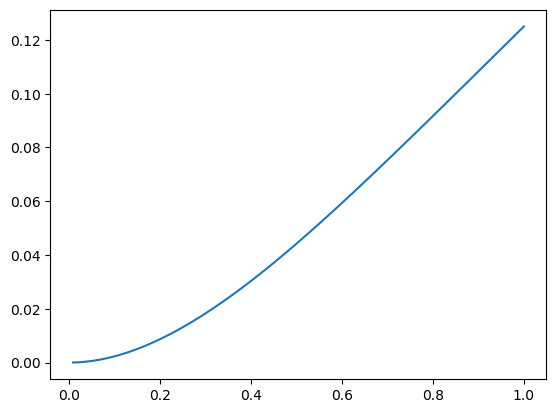

  0.000551 seconds (4 allocations: 123.297 KiB)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13c59c940>

In [153]:
using PyPlot

(x,y)=EB_Beam(125)

plot(x,y)